In [ ]:
import os
import cv2
import os.path
from pathlib import Path
from google.colab import drive

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from keras import models
from keras import layers
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Data Processing**

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


**Menyiapkan Direktori**

In [ ]:
base_dir = '/content/drive/My Drive/Capstone/'
!ls "/content/drive/My Drive/Capstone/"

'01 Project Plan'     'Another Dataset'
'02 Dataset'	       Backlogs.gsheet
'03 Brainstroming'    'Dataset Resized'
'04 Benchmark'	      'Final Submission Files'
'05 Google Colab'     'H5 Model'
'06 Latest ML Model'  'Project Scope & Deliverables and Timeline.gdoc'


In [ ]:
dataset_dir = os.path.join(base_dir, 'Dataset Resized/')

In [ ]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(dataset_dir):
    for name in files:
        full_path.append(os.path.join(path, name))
        tag.append(path.split('/')[-1])
        file_name.append(name)

In [ ]:
print(tag.count("Fresh"))

1731


In [ ]:
print(tag.count("Spoiled"))

1116


# **TRANSFORMATION PANDAS SERIES**

In [ ]:
df = pd.DataFrame({"path":full_path, 'file_name':file_name, "tag":tag})
df.groupby(['tag']).size()

tag
Fresh      1731
Spoiled    1116
dtype: int64

In [ ]:
File_Path = pd.Series(full_path, name = "PATH").astype(str)

In [ ]:
print(File_Path.head())

0    /content/drive/My Drive/Capstone/Dataset Resiz...
1    /content/drive/My Drive/Capstone/Dataset Resiz...
2    /content/drive/My Drive/Capstone/Dataset Resiz...
3    /content/drive/My Drive/Capstone/Dataset Resiz...
4    /content/drive/My Drive/Capstone/Dataset Resiz...
Name: PATH, dtype: object


In [ ]:
File_Name = pd.Series(file_name, name = "NAME").astype(str)

In [ ]:
print(File_Name.head())

0    SPOILED-369-_JPG.rf.27dc7e6c9101cfa000ee9509e3...
1    SPOILED-996-_JPG.rf.d26abbee35b30ac40fdeba3a2b...
2    SPOILED-488-_JPG.rf.bc407355e449be17a327ebc54d...
3    SPOILED-479-_JPG.rf.e38d4b914d9ad1ef813e301c62...
4    SPOILED-182-_JPG.rf.0babd89dbc29b35a6f51a5c66b...
Name: NAME, dtype: object


In [ ]:
Label_Name = pd.Series(tag, name = "CATEGORY")

In [ ]:
print(Label_Name.head())

0    Spoiled
1    Spoiled
2    Spoiled
3    Spoiled
4    Spoiled
Name: CATEGORY, dtype: object


In [ ]:
df.head()

path  \
0  /content/drive/My Drive/Capstone/Dataset Resiz...   
1  /content/drive/My Drive/Capstone/Dataset Resiz...   
2  /content/drive/My Drive/Capstone/Dataset Resiz...   
3  /content/drive/My Drive/Capstone/Dataset Resiz...   
4  /content/drive/My Drive/Capstone/Dataset Resiz...   

                                           file_name      tag  
0  SPOILED-369-_JPG.rf.27dc7e6c9101cfa000ee9509e3...  Spoiled  
1  SPOILED-996-_JPG.rf.d26abbee35b30ac40fdeba3a2b...  Spoiled  
2  SPOILED-488-_JPG.rf.bc407355e449be17a327ebc54d...  Spoiled  
3  SPOILED-479-_JPG.rf.e38d4b914d9ad1ef813e301c62...  Spoiled  
4  SPOILED-182-_JPG.rf.0babd89dbc29b35a6f51a5c66b...  Spoiled

# **TRANSFORMATION PANDAS DATAFRAME**

In [ ]:
Main_Data = pd.concat([File_Path, File_Name, Label_Name], axis=1)

In [ ]:
Main_Data = Main_Data.sample(frac = 1).reset_index(drop = True)

In [ ]:
print(Main_Data.head())

                                                PATH  \
0  /content/drive/My Drive/Capstone/Dataset Resiz...   
1  /content/drive/My Drive/Capstone/Dataset Resiz...   
2  /content/drive/My Drive/Capstone/Dataset Resiz...   
3  /content/drive/My Drive/Capstone/Dataset Resiz...   
4  /content/drive/My Drive/Capstone/Dataset Resiz...   

                                                NAME CATEGORY  
0  FRESH-369-_JPG.rf.219ece85216989425a7848011478...    Fresh  
1                          test_20171017_040721D.jpg    Fresh  
2                          test_20171017_124121D.jpg    Fresh  
3                          test_20171018_004521D.jpg  Spoiled  
4                          test_20171018_234721D.jpg  Spoiled  


In [ ]:
print(Main_Data["CATEGORY"].value_counts())

Fresh      1731
Spoiled    1116
Name: CATEGORY, dtype: int64


# **Visualization**

In [ ]:
Fresh_Meat = Main_Data[Main_Data["CATEGORY"] == "Fresh"]
Spoiled_Meat = Main_Data[Main_Data["CATEGORY"] == "Spoiled"]

In [ ]:
print(Fresh_Meat.head())

                                                 PATH  \
0   /content/drive/My Drive/Capstone/Dataset Resiz...   
1   /content/drive/My Drive/Capstone/Dataset Resiz...   
2   /content/drive/My Drive/Capstone/Dataset Resiz...   
9   /content/drive/My Drive/Capstone/Dataset Resiz...   
11  /content/drive/My Drive/Capstone/Dataset Resiz...   

                                                 NAME CATEGORY  
0   FRESH-369-_JPG.rf.219ece85216989425a7848011478...    Fresh  
1                           test_20171017_040721D.jpg    Fresh  
2                           test_20171017_124121D.jpg    Fresh  
9   FRESH-386-_JPG.rf.cc97ca5e90b666faa46a8974c06e...    Fresh  
11                          test_20171016_134321D.jpg    Fresh  


In [ ]:
print(Spoiled_Meat.head())

                                                PATH  \
3  /content/drive/My Drive/Capstone/Dataset Resiz...   
4  /content/drive/My Drive/Capstone/Dataset Resiz...   
5  /content/drive/My Drive/Capstone/Dataset Resiz...   
6  /content/drive/My Drive/Capstone/Dataset Resiz...   
7  /content/drive/My Drive/Capstone/Dataset Resiz...   

                        NAME CATEGORY  
3  test_20171018_004521D.jpg  Spoiled  
4  test_20171018_234721D.jpg  Spoiled  
5  test_20171018_144321D.jpg  Spoiled  
6  test_20171017_205321D.jpg  Spoiled  
7  test_20171018_101921D.jpg  Spoiled  


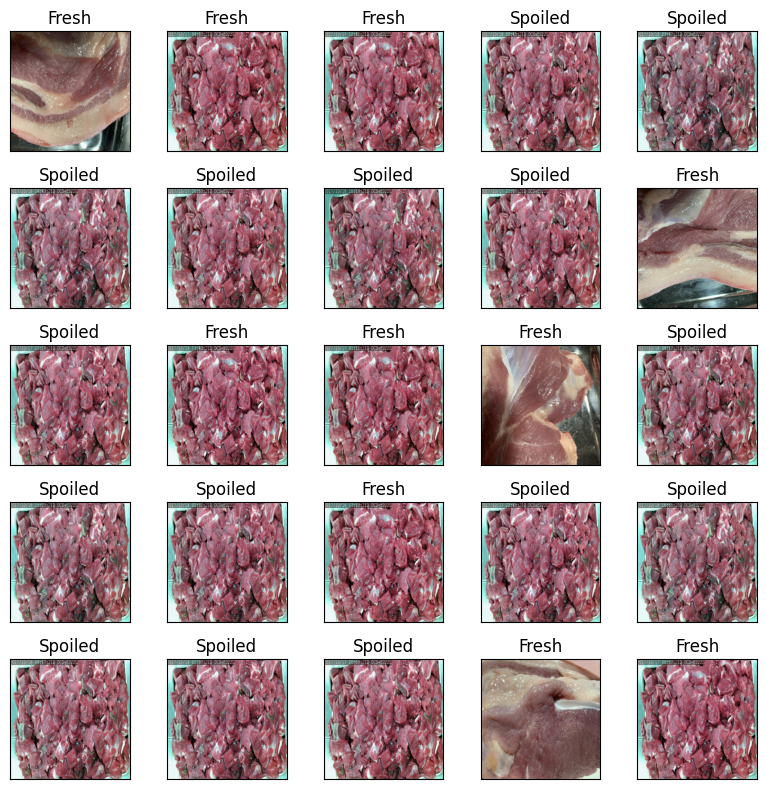

In [ ]:
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (8, 8),
                        subplot_kw = {'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data["PATH"][i]))
    ax.set_title(Main_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

# **Train Test Split**

In [ ]:
Train_Data, Test_Data = train_test_split(Main_Data,
                                         train_size = 0.8,
                                         shuffle = True,
                                         random_state = 42)

In [ ]:
print(Train_Data.shape)

(2277, 3)


In [ ]:
print(Test_Data.shape)

(570, 3)


# **IMAGE GENERATOR**

In [ ]:
Data_Generator = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [ ]:
Train_Gen = Data_Generator.flow_from_dataframe(dataframe = Train_Data,
                                               x_col = "PATH",
                                               y_col = "CATEGORY",
                                               shuffle = True,
                                               seed = 42,
                                               color_mode = "rgb",
                                               target_size = (150, 150),
                                               class_mode = "categorical",
                                               batch_size = 32,
                                               subset = "training",
                                               rotation_range = 30,
                                               horizontal_flip = True,
                                               shear_range = 0.3,
                                               nfill_mode = 'nearest',
                                               width_shift_range = 0.2,
                                               height_shift_range = 0.2,
                                               zoom_range = 0.2)

Found 1821 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="PATH". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
print(Train_Gen.classes[0:20])

[0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1]


In [ ]:
print(Train_Gen.split)

(0.2, 1)


In [ ]:
Test_Gen = Data_Generator.flow_from_dataframe(dataframe = Test_Data,
                                               x_col = "PATH",
                                               y_col = "CATEGORY",
                                               shuffle = False,
                                               seed = 42,
                                               color_mode = "rgb",
                                               target_size = (150, 150),
                                               class_mode = "categorical")

Found 570 validated image filenames belonging to 2 classes.


In [ ]:
print(Test_Gen.classes[0:20])

[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


In [ ]:
print(Test_Gen.split)

None


In [ ]:
Validation_Gen = Data_Generator.flow_from_dataframe(dataframe = Train_Data,
                                               x_col = "PATH",
                                               y_col = "CATEGORY",
                                               shuffle = True,
                                               seed = 42,
                                               color_mode = "rgb",
                                               target_size = (150, 150),
                                               class_mode="categorical",
                                               subset = "validation")

Found 455 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="PATH". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
print(Validation_Gen.classes[0:20])

[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1]


In [ ]:
print(Validation_Gen.split)

(0, 0.2)


# **MODEL**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.1),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.1),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer = "Adam",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [ ]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience = 2)

In [ ]:
ANN_Model = model.fit(Train_Gen,
                     validation_data = Validation_Gen,
                     epochs = 10,
                     batch_size = 5,
                     callbacks = Call_Back)

Epoch 1/10
57/57 [==============================] - 792s 14s/step - loss: 0.6195 - accuracy: 0.6809 - val_loss: 0.2663 - val_accuracy: 0.9143
Epoch 2/10
57/57 [==============================] - 60s 1s/step - loss: 0.2175 - accuracy: 0.9198 - val_loss: 0.1406 - val_accuracy: 0.9363
Epoch 3/10
57/57 [==============================] - 60s 1s/step - loss: 0.1647 - accuracy: 0.9385 - val_loss: 0.1129 - val_accuracy: 0.9582
Epoch 4/10
57/57 [==============================] - 60s 1s/step - loss: 0.1096 - accuracy: 0.9638 - val_loss: 0.1791 - val_accuracy: 0.9407
Epoch 5/10
57/57 [==============================] - 60s 1s/step - loss: 0.0912 - accuracy: 0.9709 - val_loss: 0.0685 - val_accuracy: 0.9780
Epoch 6/10
57/57 [==============================] - 67s 1s/step - loss: 0.0929 - accuracy: 0.9709 - val_loss: 0.0623 - val_accuracy: 0.9802
Epoch 7/10
57/57 [==============================] - 64s 1s/step - loss: 0.0601 - accuracy: 0.9786 - val_loss: 0.1208 - val_accuracy: 0.9429
Epoch 8/10
57/57 [

In [ ]:
Model_Results = model.evaluate(Train_Gen, verbose = False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.0181
ACCURACY:  1.00


In [ ]:
Model_Results = model.evaluate(Validation_Gen, verbose = False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.0390
ACCURACY:  0.99


In [ ]:
Model_Results = model.evaluate(Test_Gen, verbose = False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.0392
ACCURACY:  0.99


In [ ]:
jumlah_prediksi_benar = 0
jumlah_data = 0
for i in range(len(Test_Gen)):
    batch = next(Test_Gen)
    labels = batch[1]
    prediksi_batch = model.predict_on_batch(batch[0])
    prediksi_classes = np.argmax(prediksi_batch, axis = 1)
    jumlah_data += len(labels)
    jumlah_prediksi_benar += np.sum(prediksi_classes == np.argmax(labels, axis=1))

persentase_keberhasilan = (jumlah_prediksi_benar / jumlah_data) * 100
print(f"Persentase Keberhasilan Model: {persentase_keberhasilan}%")

Persentase Keberhasilan Model: 98.7719298245614%


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        1

In [ ]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1, len(val_losses) + 1)

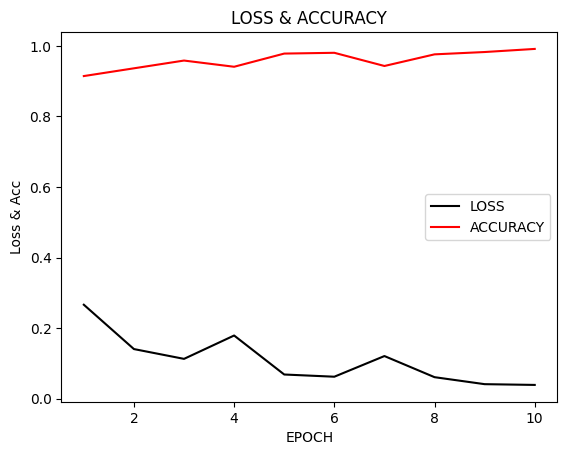

In [ ]:
plt.plot(epochs, val_losses, "k-", label = "LOSS")
plt.plot(epochs, val_acc, "r", label = "ACCURACY")
plt.title("LOSS & ACCURACY")
plt.xlabel("EPOCH")
plt.ylabel("Loss & Acc")
plt.legend()
plt.show()

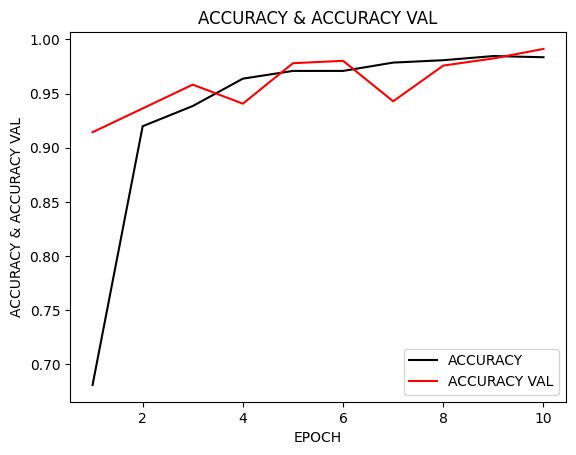

In [ ]:
plt.plot(epochs, acc, "k-", label = "ACCURACY")
plt.plot(epochs, val_acc, "r", label = "ACCURACY VAL")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

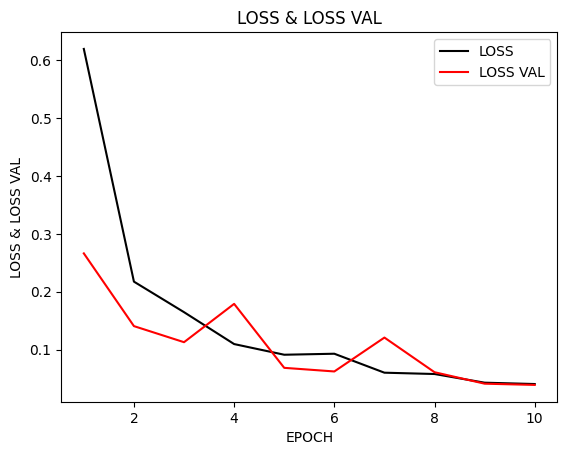

In [ ]:
plt.plot(epochs, losses, "k-", label = "LOSS")
plt.plot(epochs, val_losses, "r", label = "LOSS VAL")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

<Axes: >

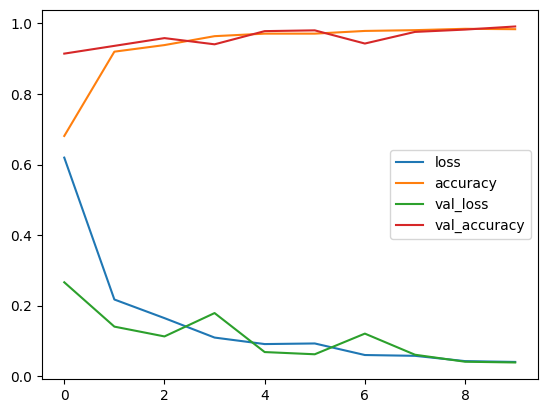

In [ ]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

In [ ]:
Model_Predict = model.predict(Test_Gen)

18/18 [==============================] - 7s 382ms/step


In [ ]:
Model_Predict = np.argmax(Model_Predict,axis=1)

In [ ]:
Predict_Label = (Test_Gen.class_indices)
Predict_Label = dict((v,k) for k,v in Predict_Label.items())

In [ ]:
Model_Predict = [Predict_Label[k] for k in Model_Predict]

In [ ]:
print(Model_Predict[:10])

['Fresh', 'Spoiled', 'Fresh', 'Spoiled', 'Fresh', 'Fresh', 'Spoiled', 'Fresh', 'Fresh', 'Fresh']


In [ ]:
Test_Results = list(Test_Data["CATEGORY"])

In [ ]:
Class_Report = classification_report(Test_Results, Model_Predict)
print(Class_Report)

              precision    recall  f1-score   support

       Fresh       0.99      0.99      0.99       339
     Spoiled       0.99      0.98      0.98       231

    accuracy                           0.99       570
   macro avg       0.99      0.99      0.99       570
weighted avg       0.99      0.99      0.99       570



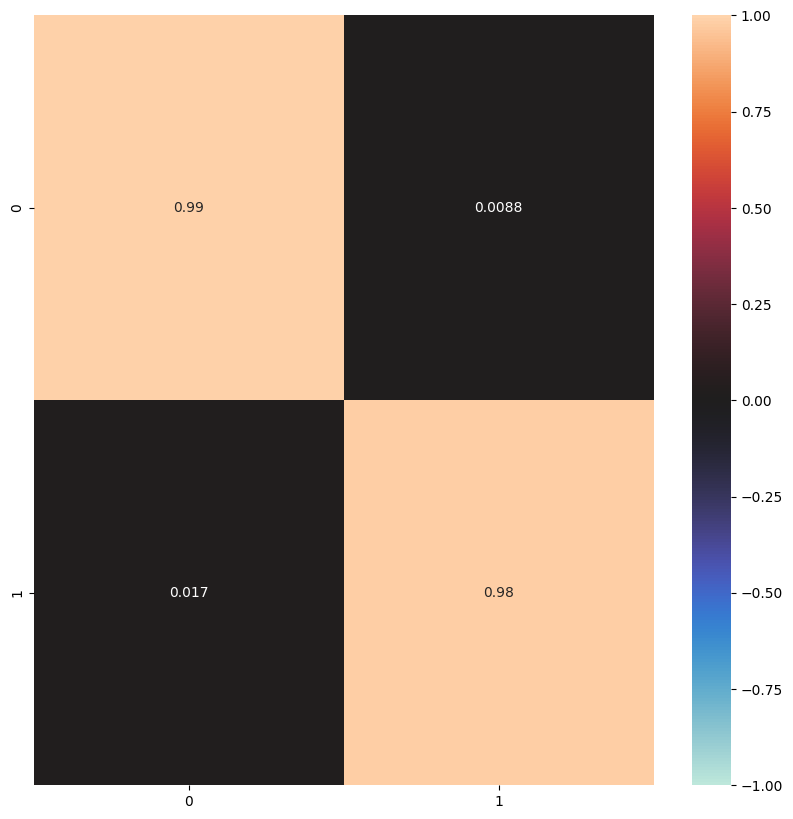

In [ ]:
Conf_Report = confusion_matrix(Test_Results, Model_Predict, normalize = "true")
figure = plt.figure(figsize = (10, 10))
sns.heatmap(Conf_Report, vmax = 1, center = 0, vmin = -1, annot = True)
plt.show()

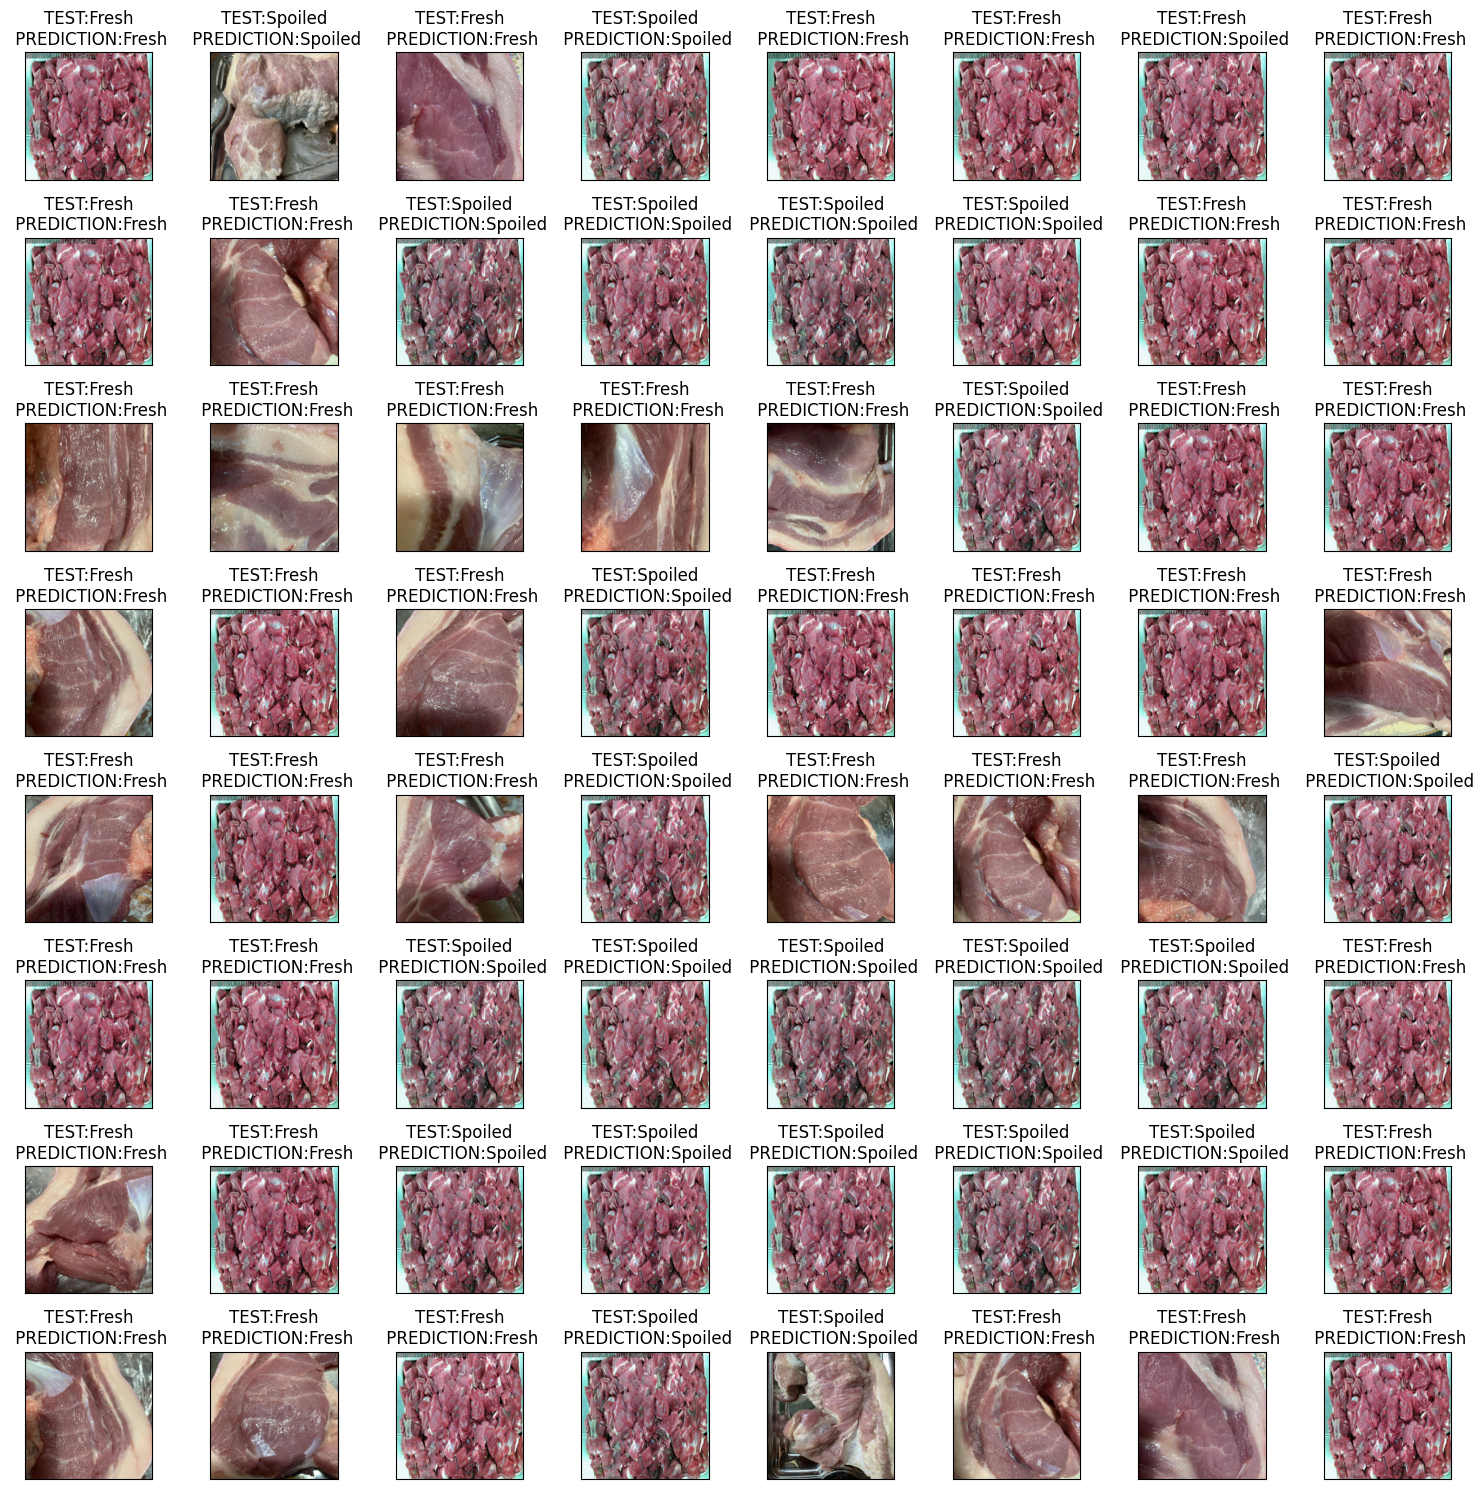

In [ ]:
fig, axes = plt.subplots(nrows = 8,
                         ncols = 8,
                         figsize = (15, 15),
                        subplot_kw = {'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Test_Data["PATH"].iloc[i]))
    ax.set_title(f"TEST:{Test_Data.CATEGORY.iloc[i]}\n PREDICTION:{Model_Predict[i]}")

plt.tight_layout()
plt.show()

## Save Model

In [ ]:
model.save("model_meaty.h5")

In [ ]:
import tensorflow as tf
tf.saved_model.save(model, '/sample_data')

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('/sample_data')
tflite_model = converter.convert()

with open('model_meaty.tflite', 'wb') as f:
    f.write(tflite_model)

## Manual Testing

In [ ]:
Train_Gen.class_indices

{'Fresh': 0, 'Spoiled': 1}

Saving test_20171017_190321D.jpg to test_20171017_190321D.jpg
1/1 [==============================] - 0s 111ms/step
test_20171017_190321D.jpg
['Spoiled']


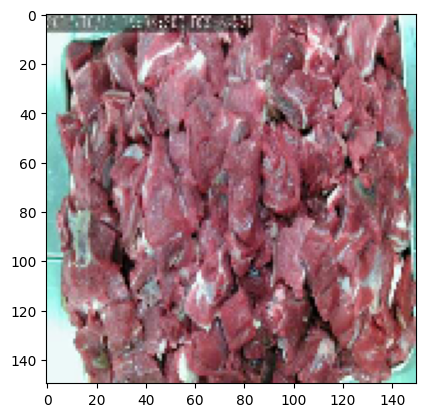

In [ ]:
import numpy as np
import keras.utils as image
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img_source = image.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img_source)
  x = image.img_to_array(img_source)
  x = x /225.
  x = np.expand_dims(x, axis = 0)

  test_dt = np.vstack([x])
  classes = model.predict(test_dt)

  print(fn)

  classes = np.argmax(classes,axis=1)

  Predict_Label = (Test_Gen.class_indices)
  Predict_Label = dict((v,k) for k,v in Predict_Label.items())

  classes = [Predict_Label[k] for k in classes]

  print(classes)

## Test Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import keras.utils as image
import os

In [ ]:
model = load_model('model_meaty.h5')